In [290]:
# Import Libraries
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import numpy as np

In [136]:
# Download necessary resources from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tsholofelo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tsholofelo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tsholofelo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [93]:
# Load The Dataset
sentiment_path = "combined_sentiment_data.csv"
emotion_path = "combined_emotion.csv"

In [95]:
sentiment = pd.read_csv(sentiment_path)
emotion = pd.read_csv(emotion_path)

In [97]:
# Display Basic Information About The Dataset
sentiment_info = sentiment.info()
emotion_info = emotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   3309 non-null   object
 1   sentiment  3309 non-null   object
dtypes: object(2)
memory usage: 51.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422746 entries, 0 to 422745
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sentence  422746 non-null  object
 1   emotion   422746 non-null  object
dtypes: object(2)
memory usage: 6.5+ MB


In [99]:
# Display The First Few Rows To Understand The Structure Od The Dataset
print(sentiment.head())
print(emotion.head())

                                            sentence sentiment
0  So there is no way for me to plug it in here i...  negative
1                        Good case, Excellent value.  positive
2                             Great for the jawbone.  positive
3  Tied to charger for conversations lasting more...  negative
4                                  The mic is great.  positive
                                            sentence emotion
0      i just feel really helpless and heavy hearted    fear
1  ive enjoyed being able to slouch about relax a...     sad
2  i gave up my internship with the dmrg and am f...    fear
3                         i dont know i feel so lost     sad
4  i am a kindergarten teacher and i am thoroughl...    fear


In [101]:
# Check for duplicate sentences in both datasets
sentiment_duplicates = sentiment.duplicated(subset=['sentence']).sum()
emotion_duplicates = emotion.duplicated(subset=['sentence']).sum()

In [103]:
sentiment_duplicates, emotion_duplicates

(20, 28924)

In [105]:
# Remove duplicate sentences
sentiment_cleaned = sentiment.drop_duplicates(subset=['sentence']).reset_index(drop=True)
emotion_cleaned = emotion.drop_duplicates(subset=['sentence']).reset_index(drop=True)

In [107]:
# Verify removal
sentiment_duplicates_after = sentiment_cleaned.duplicated(subset=['sentence']).sum()
emotion_duplicates_after = emotion_cleaned.duplicated(subset=['sentence']).sum()

In [109]:
sentiment_cleaned.shape, emotion_cleaned.shape, sentiment_duplicates_after, emotion_duplicates_after

((3289, 2), (393822, 2), 0, 0)

In [113]:
# Convert to lowercase and strip extra spaces
sentiment_cleaned["sentence"] = sentiment_cleaned["sentence"].str.lower().str.strip()
emotion_cleaned["sentence"] = emotion_cleaned["sentence"].str.lower().str.strip()

In [115]:
#Show the data with lowercase and no extra spaces
print(sentiment_cleaned.head())
print(emotion_cleaned.head())


                                            sentence sentiment
0  so there is no way for me to plug it in here i...  negative
1                        good case, excellent value.  positive
2                             great for the jawbone.  positive
3  tied to charger for conversations lasting more...  negative
4                                  the mic is great.  positive
                                            sentence emotion
0      i just feel really helpless and heavy hearted    fear
1  ive enjoyed being able to slouch about relax a...     sad
2  i gave up my internship with the dmrg and am f...    fear
3                         i dont know i feel so lost     sad
4  i am a kindergarten teacher and i am thoroughl...    fear


In [117]:
# Remove punctuation and special characters from the 'sentence' column
sentiment_cleaned["sentence"] = sentiment_cleaned["sentence"].str.replace(r"[^a-zA-Z0-9\s]", "", regex=True)
emotion_cleaned["sentence"] = emotion_cleaned["sentence"].str.replace(r"[^a-zA-Z0-9\s]", "", regex=True)

In [119]:
#Show the data with no punctuation and special chars
print(sentiment_cleaned.head())
print(emotion_cleaned.head())


                                            sentence sentiment
0  so there is no way for me to plug it in here i...  negative
1                          good case excellent value  positive
2                              great for the jawbone  positive
3  tied to charger for conversations lasting more...  negative
4                                   the mic is great  positive
                                            sentence emotion
0      i just feel really helpless and heavy hearted    fear
1  ive enjoyed being able to slouch about relax a...     sad
2  i gave up my internship with the dmrg and am f...    fear
3                         i dont know i feel so lost     sad
4  i am a kindergarten teacher and i am thoroughl...    fear


In [123]:
# Download stopwords if not already downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tsholofelo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [125]:
# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

In [129]:
# Remove stopwords from sentiment dataset
sentiment_cleaned["sentence"] = sentiment_cleaned["sentence"].apply(
    lambda x: " ".join([word for word in x.split() if word.lower() not in stop_words])
)

In [131]:
# Remove stopwords from emotion dataset
emotion_cleaned["sentence"] = emotion_cleaned["sentence"].apply(
    lambda x: " ".join([word for word in x.split() if word.lower() not in stop_words])
)


In [134]:
# Display cleaned data
print(sentiment_cleaned.head())
print(emotion_cleaned.head())


                                            sentence sentiment
0                    way plug us unless go converter  negative
1                          good case excellent value  positive
2                                      great jawbone  positive
3  tied charger conversations lasting 45 minutesm...  negative
4                                          mic great  positive
                                            sentence emotion
0                 feel really helpless heavy hearted    fear
1  ive enjoyed able slouch relax unwind frankly n...     sad
2            gave internship dmrg feeling distraught    fear
3                                dont know feel lost     sad
4  kindergarten teacher thoroughly weary job take...    fear


In [142]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

In [146]:
# Lemmatize the sentence column in sentiment
sentiment_cleaned["sentence"] = sentiment_cleaned["sentence"].apply(
    lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [148]:
# Lemmatize the sentence column in emotion
emotion_cleaned["sentence"] = emotion_cleaned["sentence"].apply(
    lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [150]:
print(emotion_cleaned)
print(sentiment_cleaned)

                                                 sentence  emotion
0                      feel really helpless heavy hearted     fear
1       ive enjoyed able slouch relax unwind frankly n...      sad
2                 gave internship dmrg feeling distraught     fear
3                                     dont know feel lost      sad
4       kindergarten teacher thoroughly weary job take...     fear
...                                                   ...      ...
393817  cry feel sense loss patient die helped die dig...      joy
393818  feel like telling horny devil find site suited...     love
393819  feel curious previous early dawn time seek tro...  suprise
393820  feel becuase tyranical nature government el sa...    anger
393821  think spent time investigating surroundings th...  suprise

[393822 rows x 2 columns]
                                               sentence sentiment
0                        way plug u unless go converter  negative
1                             good ca

In [154]:
# Get summary statistics for the sentiment_cleaned dataframe
summary_stats = sentiment_cleaned.describe()
# Display the summary statistics
print(summary_stats)

           sentence sentiment
count          3289      3289
unique         3231         2
top     great phone  positive
freq              5      1667


from the output, it appears that there are duplicates in the sentence column. 
The unique count (3231) is less than the count (3289), 
which means some sentences appear more than once.

In [160]:
# Remove duplicate sentences
sentiment_cleaned = sentiment_cleaned.drop_duplicates(subset=['sentence'], keep='first')

# Check the result
print(sentiment_cleaned.describe())

                              sentence sentiment
count                             3231      3231
unique                            3231         2
top     way plug u unless go converter  positive
freq                                 1      1641


from the output, it appears that there are duplicates in the sentence column. 
The unique count (3231) is less than the count (3289), 
which means some sentences appear more than once.

In [156]:
# Get summary statistics for the emotion_cleaned dataframe
summary_stats = emotion_cleaned.describe()
# Display the summary statistics
print(summary_stats)

            sentence emotion
count         393822  393822
unique        381953       6
top     feel wronged     joy
freq              41  135030


from the output, it appears that there are duplicates in the sentence column. 
The unique count (381953) is less than the count (393822), 
which means some sentences appear more than once.

In [166]:
# Remove duplicate sentences
emotion_cleaned = emotion_cleaned.drop_duplicates(subset=['sentence'], keep='first')

# Check the result
print(emotion_cleaned.describe())

                                  sentence emotion
count                               381953  381953
unique                              381953       6
top     feel really helpless heavy hearted     joy
freq                                     1  131242


In [170]:
# Save the cleaned data to a CSV file
sentiment_cleaned.to_csv('cleaned_sentiment.csv', index=False)

# Confirmation message
print("Data saved as 'cleaned_sentiment.csv'.")

Data saved as 'cleaned_sentiment.csv'.


In [172]:
# Save the cleaned data to a CSV file
emotion_cleaned.to_csv('cleaned_emotion.csv', index=False)

# Confirmation message
print("Data saved as 'cleaned_emotion.csv'.")

Data saved as 'cleaned_emotion.csv'.


C:\Users\Tsholofelo\AppData\Local\Temp\ipykernel_7812\2892238415.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sentiment_cleaned, x='sentiment', palette='Set2')


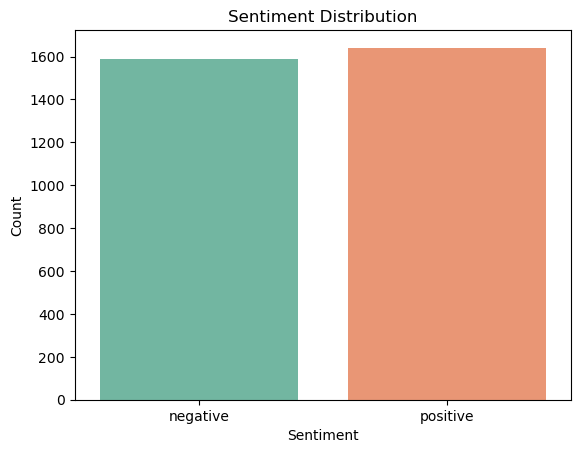

In [178]:
# Plot a bar chart for the 'sentiment' column
sns.countplot(data=sentiment_cleaned, x='sentiment', palette='Set2')

# Add title and labels
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()

C:\Users\Tsholofelo\AppData\Local\Temp\ipykernel_7812\3725016269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=emotion_cleaned, x='emotion', palette='Set2')


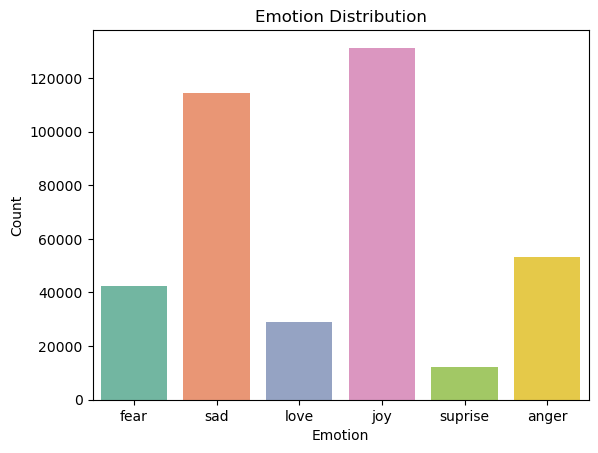

In [180]:
# Plot a bar chart for the 'emotion' column
sns.countplot(data=emotion_cleaned, x='emotion', palette='Set2')

# Add title and labels
plt.title('Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')

# Show the plot
plt.show()

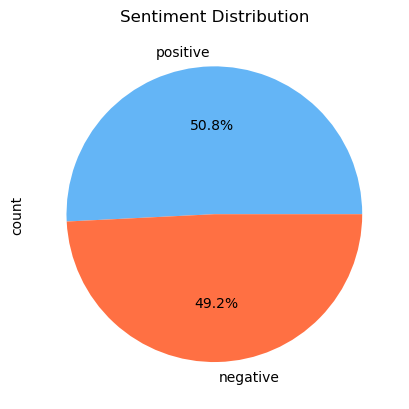

In [182]:
# Count the occurrences of each sentiment
sentiment_counts = sentiment_cleaned['sentiment'].value_counts()

# Plot a pie chart
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#64b5f6', '#ff7043'])

# Add title
plt.title('Sentiment Distribution')

# Show the plot
plt.show()

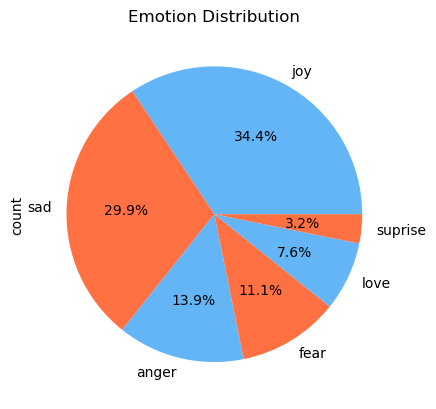

In [184]:
# Count the occurrences of each Emotion
emotion_counts = emotion_cleaned['emotion'].value_counts()

# Plot a pie chart
emotion_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#64b5f6', '#ff7043'])

# Add title
plt.title('Emotion Distribution')

# Show the plot
plt.show()

In [186]:
#check the data information
display(sentiment_cleaned.info(), emotion_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3231 entries, 0 to 3288
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   3231 non-null   object
 1   sentiment  3231 non-null   object
dtypes: object(2)
memory usage: 75.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 381953 entries, 0 to 393821
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sentence  381953 non-null  object
 1   emotion   381953 non-null  object
dtypes: object(2)
memory usage: 8.7+ MB


None

None

In [194]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the sentiment dataset
X_sentiment_tfidf = tfidf_vectorizer.fit_transform(sentiment_cleaned['sentence'])

# Transform the emotion dataset (do not fit again)
X_emotion_tfidf = tfidf_vectorizer.transform(emotion_cleaned['sentence'])

# Convert the results into a DataFrame for readability (optional)
sentiment_tfidf = pd.DataFrame(X_sentiment_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
emotion_tfidf = pd.DataFrame(X_emotion_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF matrix
print(sentiment_tfidf.head())
print(emotion_tfidf.head())

    10   12   20   30   40   90  ability  able  absolutely  access  ...  wow  \
0  0.0  0.0  0.0  0.0  0.0  0.0      0.0   0.0         0.0     0.0  ...  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0      0.0   0.0         0.0     0.0  ...  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0      0.0   0.0         0.0     0.0  ...  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0      0.0   0.0         0.0     0.0  ...  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0      0.0   0.0         0.0     0.0  ...  0.0   

   writing  written  wrong  year  youd  youll  young  youre  zero  
0      0.0      0.0    0.0   0.0   0.0    0.0    0.0    0.0   0.0  
1      0.0      0.0    0.0   0.0   0.0    0.0    0.0    0.0   0.0  
2      0.0      0.0    0.0   0.0   0.0    0.0    0.0    0.0   0.0  
3      0.0      0.0    0.0   0.0   0.0    0.0    0.0    0.0   0.0  
4      0.0      0.0    0.0   0.0   0.0    0.0    0.0    0.0   0.0  

[5 rows x 1000 columns]
    10   12   20   30   40   90  ability      able  absolutely  access  ...  \
0  0.0 

In [224]:
# Combine both datasets before vectorization
combined_X = pd.concat([emotion_cleaned['sentence'], sentiment_cleaned['sentence']])

# Fit on combined data
tfidf_vectorizer.fit(combined_X)

# Now transform separately
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_train1_tfidf = tfidf_vectorizer.transform(X_train1)
X_test1_tfidf = tfidf_vectorizer.transform(X_test1)

In [226]:
# Emotion Dataset
X_emotion = emotion_cleaned['sentence']
y_emotion = emotion_cleaned['emotion']

# Sentiment Dataset
X_sentiment = sentiment_cleaned['sentence']
y_sentiment = sentiment_cleaned['sentiment']


In [228]:
# Emotion dataset split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_emotion, y_emotion, test_size=0.2, random_state=42)

# Sentiment dataset split
X_train, X_test, y_train, y_test = train_test_split(X_sentiment, y_sentiment, test_size=0.2, random_state=42)


In [230]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

In [232]:
#verify the shape of the split data
print("Emotion Dataset Shapes:")
print("X_train1:", X_train1_tfidf.shape, "| X_test1:", X_test1_tfidf.shape)
print("Sentiment Dataset Shapes:")
print("X_train:", X_train_tfidf.shape, "| X_test:", X_test_tfidf.shape)

Emotion Dataset Shapes:
X_train1: (305562, 1000) | X_test1: (76391, 1000)
Sentiment Dataset Shapes:
X_train: (2584, 1000) | X_test: (647, 1000)


In [236]:
#Train The Logistic Regression Model On the Sentiment
# Initialize Logistic Regression model
log_reg_sentiment = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on sentiment dataset
log_reg_sentiment.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_sentiment = log_reg_sentiment.predict(X_test_tfidf)

# Evaluate model performance
print("Sentiment Classification Report:")
print(classification_report(y_test, y_pred_sentiment))
print("Sentiment Accuracy:", accuracy_score(y_test, y_pred_sentiment))

Sentiment Classification Report:
              precision    recall  f1-score   support

    negative       0.67      0.79      0.73       301
    positive       0.78      0.66      0.72       346

    accuracy                           0.72       647
   macro avg       0.73      0.73      0.72       647
weighted avg       0.73      0.72      0.72       647

Sentiment Accuracy: 0.723338485316847


In [242]:
#Hyperparameter tuning because the precision and recall are below 70
# Define the parameter grid for tuning C
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Grid Search with 5-fold Cross Validation
grid_search_sentiment = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_sentiment.fit(X_train_tfidf, y_train)

# Best hyperparameter
print("Best C for Sentiment Logistic Regression:", grid_search_sentiment.best_params_)

# Train with the best parameter
best_log_reg_sentiment = LogisticRegression(C=grid_search_sentiment.best_params_['C'], max_iter=1000, random_state=42)
best_log_reg_sentiment.fit(X_train_tfidf, y_train)

# Predictions
y_pred_best_sentiment = best_log_reg_sentiment.predict(X_test_tfidf)

# Evaluate the model
print("Optimized Sentiment Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_best_sentiment))
print("Optimized Sentiment Logistic Regression Report:\n", classification_report(y_test, y_pred_best_sentiment))


Best C for Sentiment Logistic Regression: {'C': 1}
Optimized Sentiment Logistic Regression Accuracy: 0.723338485316847
Optimized Sentiment Logistic Regression Report:
               precision    recall  f1-score   support

    negative       0.67      0.79      0.73       301
    positive       0.78      0.66      0.72       346

    accuracy                           0.72       647
   macro avg       0.73      0.73      0.72       647
weighted avg       0.73      0.72      0.72       647



As observed by the results obtained, tuning wasnt really necessary, so lets move to other models

In [238]:
#Train The Logistic Regression Model On The Emotion
# Initialize Logistic Regression model
log_reg_emotion = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on emotion dataset
log_reg_emotion.fit(X_train1_tfidf, y_train1)

# Predict on the test set
y_pred_emotion = log_reg_emotion.predict(X_test1_tfidf)

# Evaluate model performance
print("Emotion Classification Report:")
print(classification_report(y_test1, y_pred_emotion))
print("Emotion Accuracy:", accuracy_score(y_test1, y_pred_emotion))


Emotion Classification Report:
              precision    recall  f1-score   support

       anger       0.92      0.85      0.88     10570
        fear       0.89      0.84      0.87      8396
         joy       0.88      0.94      0.91     26151
        love       0.88      0.83      0.85      5764
         sad       0.93      0.92      0.92     23026
     suprise       0.84      0.80      0.82      2484

    accuracy                           0.90     76391
   macro avg       0.89      0.86      0.88     76391
weighted avg       0.90      0.90      0.90     76391

Emotion Accuracy: 0.8989802463641005


In [247]:
# Train SVM on Sentiment dataset
svm_sentiment = SVC(kernel='linear', C=1)
svm_sentiment.fit(X_train_tfidf, y_train)

# Predictions
y_pred_svm_sentiment = svm_sentiment.predict(X_test_tfidf)

# Evaluate the model
print("SVM Sentiment Accuracy:", accuracy_score(y_test, y_pred_svm_sentiment))
print("SVM Sentiment Classification Report:\n", classification_report(y_test, y_pred_svm_sentiment))


SVM Sentiment Accuracy: 0.7202472952086554
SVM Sentiment Classification Report:
               precision    recall  f1-score   support

    negative       0.67      0.79      0.73       301
    positive       0.79      0.66      0.71       346

    accuracy                           0.72       647
   macro avg       0.73      0.73      0.72       647
weighted avg       0.73      0.72      0.72       647



In [249]:
# Train SVM on Emotion dataset
svm_emotion = SVC(kernel='linear', C=1)
svm_emotion.fit(X_train_tfidf, y_train)

# Predictions
y_pred_svm_emotion = svm_emotion.predict(X_test_tfidf)

# Evaluate the model
print("SVM Emotion Accuracy:", accuracy_score(y_test, y_pred_svm_emotion))
print("SVM Emotion Classification Report:\n", classification_report(y_test, y_pred_svm_emotion))


SVM Emotion Accuracy: 0.7202472952086554
SVM Emotion Classification Report:
               precision    recall  f1-score   support

    negative       0.67      0.79      0.73       301
    positive       0.79      0.66      0.71       346

    accuracy                           0.72       647
   macro avg       0.73      0.73      0.72       647
weighted avg       0.73      0.72      0.72       647



since the accuracy is not below 70%, tuning wont be necessary

In [256]:
# Train Random Forest on Sentiment dataset
rf_sentiment = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sentiment.fit(X_train_tfidf, y_train)

# Predictions
y_pred_rf_sentiment = rf_sentiment.predict(X_test_tfidf)

# Evaluate the model
print("Random Forest Sentiment Accuracy:", accuracy_score(y_test, y_pred_rf_sentiment))
print("Random Forest Sentiment Classification Report:\n", classification_report(y_test, y_pred_rf_sentiment))


Random Forest Sentiment Accuracy: 0.7217928902627512
Random Forest Sentiment Classification Report:
               precision    recall  f1-score   support

    negative       0.68      0.77      0.72       301
    positive       0.77      0.68      0.72       346

    accuracy                           0.72       647
   macro avg       0.72      0.72      0.72       647
weighted avg       0.73      0.72      0.72       647



In [258]:
# Train Random Forest on Emotion dataset
rf_emotion = RandomForestClassifier(n_estimators=100, random_state=42)
rf_emotion.fit(X_train_tfidf, y_train)

# Predictions
y_pred_rf_emotion = rf_emotion.predict(X_test_tfidf)

# Evaluate the model
print("Random Forest Emotion Accuracy:", accuracy_score(y_test, y_pred_rf_emotion))
print("Random Forest Emotion Classification Report:\n", classification_report(y_test, y_pred_rf_emotion))


Random Forest Emotion Accuracy: 0.7217928902627512
Random Forest Emotion Classification Report:
               precision    recall  f1-score   support

    negative       0.68      0.77      0.72       301
    positive       0.77      0.68      0.72       346

    accuracy                           0.72       647
   macro avg       0.72      0.72      0.72       647
weighted avg       0.73      0.72      0.72       647

